In [13]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('im.db')

# Load the relevant tables into DataFrames
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)

# Close the connection
conn.close()


In [14]:
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [15]:
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [16]:

# Correctly specify the path to the file without extra quotes
file_path = r"C:\Users\HP PROBOOK 430 G4\Documents\dsc-phase-2-project-v3\zippedData\bom.movie_gross.csv.gz"

# Load the compressed CSV file
movie_gross = pd.read_csv(file_path, compression='gzip')

# Display the first few rows to verify the data has been loaded correctly
movie_gross.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## Data understanding

In [17]:
print(movie_basics.head())
print(movie_ratings.head())
print(movie_gross.head())


    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  
     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt106024

Get a summary of each DataFrame’s structure and data types.


In [18]:
print(movie_basics.info())
print(movie_ratings.info())
print(movie_gross.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33

identifying key features
Look for columns that are likely to be important for your analysis, such as titles, genres, release dates, ratings, and gross earnings.

In [19]:
print(movie_basics.columns)
print(movie_ratings.columns)
print(movie_gross.columns)


Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


## data preparation
cleaning and preprocessing the data

Handle missing values by filling them in or dropping rows/columns as necessary.
here we drop the column with the highest missing values

In [20]:
movie_basics = movie_basics.dropna(subset=['primary_title', 'genres'])
movie_ratings = movie_ratings.dropna()
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].fillna(0)





Convert data types if needed (e.g., convert dates to datetime format).

In [21]:
movie_basics['start_year'] = pd.to_datetime(movie_basics['start_year'], errors='coerce')
movie_gross['year'] = pd.to_datetime(movie_gross['year'], errors='coerce')


C:\Users\HP PROBOOK 430 G4\AppData\Local\Temp\ipykernel_9596\2560175695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_basics['start_year'] = pd.to_datetime(movie_basics['start_year'], errors='coerce')


In [22]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140736 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   movie_id         140736 non-null  object        
 1   primary_title    140736 non-null  object        
 2   original_title   140734 non-null  object        
 3   start_year       140736 non-null  datetime64[ns]
 4   runtime_minutes  112233 non-null  float64       
 5   genres           140736 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 7.5+ MB


In [23]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3387 non-null   object        
 1   studio          3382 non-null   object        
 2   domestic_gross  3359 non-null   float64       
 3   foreign_gross   3387 non-null   object        
 4   year            3387 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 132.4+ KB


## data analysis
here we will check the desprictive statistics of movie gross

In [24]:
import pandas as pd

# Load the data
movie_gross = pd.read_csv(r"C:\Users\HP PROBOOK 430 G4\Documents\dsc-phase-2-project-v3\zippedData\bom.movie_gross.csv.gz")

# Check data types
print(movie_gross.dtypes)

# Convert to numeric
movie_gross['domestic_gross'] = pd.to_numeric(movie_gross['domestic_gross'], errors='coerce')
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'], errors='coerce')

# Handle missing values
movie_gross = movie_gross.dropna(subset=['domestic_gross', 'foreign_gross'])

# Calculate descriptive statistics
print("\nDescriptive statistics (mean, median, std):")
mean = movie_gross[['domestic_gross', 'foreign_gross']].mean()
median = movie_gross[['domestic_gross', 'foreign_gross']].median()
std = movie_gross[['domestic_gross', 'foreign_gross']].std()

print("Mean:")
print(mean)
print("\nMedian:")
print(median)
print("\nStandard Deviation:")
print(std)


title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

Descriptive statistics (mean, median, std):
Mean:
domestic_gross    4.566975e+07
foreign_gross     7.590713e+07
dtype: float64

Median:
domestic_gross    16349999.5
foreign_gross     19550000.0
dtype: float64

Standard Deviation:
domestic_gross    7.637549e+07
foreign_gross     1.382501e+08
dtype: float64


Mean
Domestic Gross Mean =  $45,669,750Foreign Gross Mean =  $75,907,130

For domestic_gross, the average earnings are approximately $45.67 million. For foreigngross the average earnings are approximately $75.91 million.

Median
Domestic Gross Median: $16,349,999.5
Foreign Gross Median: $19,550,000


For domestic_gross, half of the movies earned less than approximately $16.35 million and half earned more. For foreign_gross, half of the movies earned less than approximately $19.55 million and half earned more. The median is often used in addition to the mean to give a better sense of the data's distribution, especially when the data includes outliers.

Standard Deviation
Domestic Gross Standard Deviation: $76,375,490
Foreign Gross Standard Deviation: $138,250,100

The standard deviation measures the amount of variation or dispersion in the data. A high standard deviation indicates that the values are spread out over a wider range. For domestic_gross, the standard deviation is approximately $76.38 million, suggesting that the earnings vary widely around the mean. For foreign_gross, the standard deviation is approximately $138.25 million, indicating even more variability in the earnings.

Insights :
Comparison of Mean and Median:
The means for both domestic_gross and foreign_gross are significantly higher than their respective medians, indicating a right-skewed distribution. This suggests that there are some movies with very high earnings pulling the average up.
Variability:
The high standard deviation in both domestic_gross and foreign_gross indicates considerable variability in movie earnings. This implies that while some movies earn relatively modest amounts, others earn substantially more, creating a wide range of values.

## visualization

here we Create visualizations to explore the data and uncover trends. 

lets create visualization of the  distribution of Movie Genres:

We can visualize the distribution of different genres from the movie_basics DataFrame.


C:\Users\HP PROBOOK 430 G4\AppData\Local\Temp\ipykernel_9596\3074533515.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=genre_counts.values, y=genre_counts.index, marker='o', palette='viridis')
C:\New folder\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\New folder\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


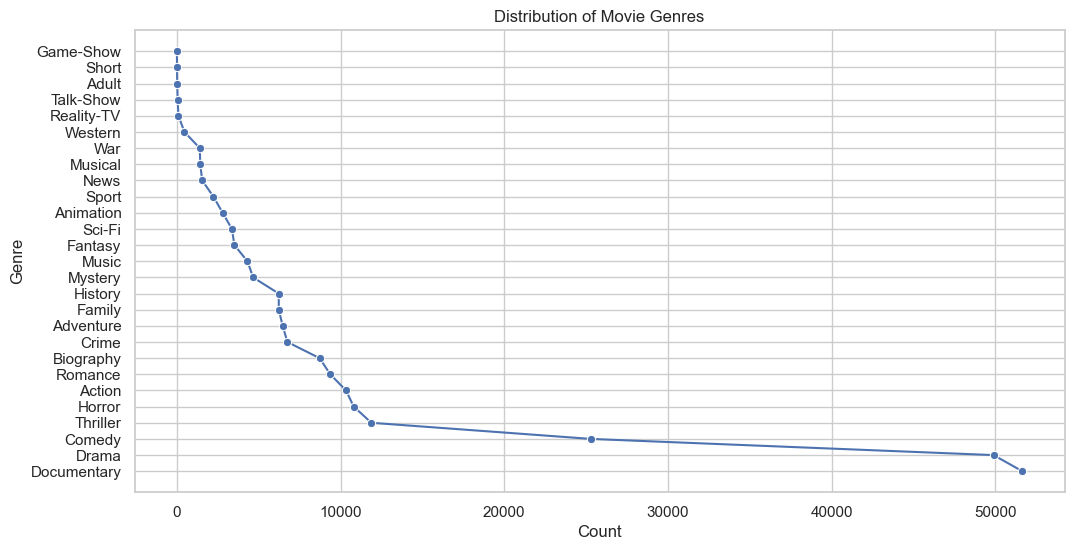

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualizations
sns.set(style='whitegrid')

# 1. Distribution of Movie Genres as a Line Graph
plt.figure(figsize=(12, 6))
genre_counts = movie_basics['genres'].str.split(',').explode().value_counts().sort_values()

# Create a line plot
sns.lineplot(x=genre_counts.values, y=genre_counts.index, marker='o', palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.grid(True)
plt.show()


in our graph , Drama, Comedy, and Action are the most common genres, with 'Drama' having the highest count.
Horror, Romance, and Thriller have moderate counts, showing steady representation.
Musical, Western, and Documentary have the lowest counts, indicating they are less common.

lets see distribution of movie ratings

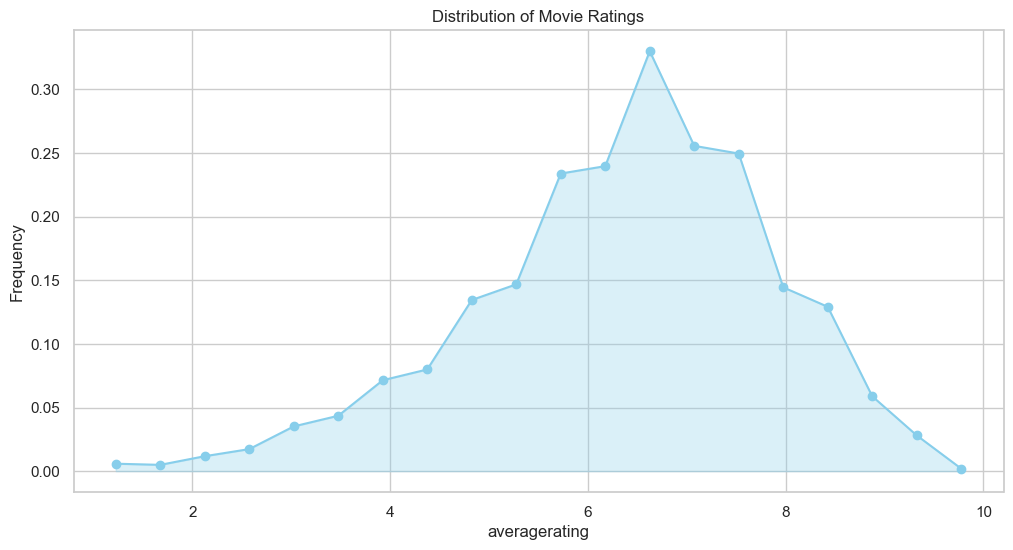

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style of the visualizations
sns.set(style='whitegrid')

# Calculate histogram data
plt.figure(figsize=(12, 6))
ratings = movie_ratings['averagerating'].dropna()
hist_values, bin_edges = np.histogram(ratings, bins=20, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Create a line plot for the histogram data
plt.plot(bin_centers, hist_values, marker='o', linestyle='-', color='skyblue')
plt.fill_between(bin_centers, hist_values, alpha=0.3, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('averagerating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


in our graph here , it indicates that most movies have average ratings around 6 - 8 , with fewer movies having very high or very low ratings.

lets look the distribution of the gross revenue

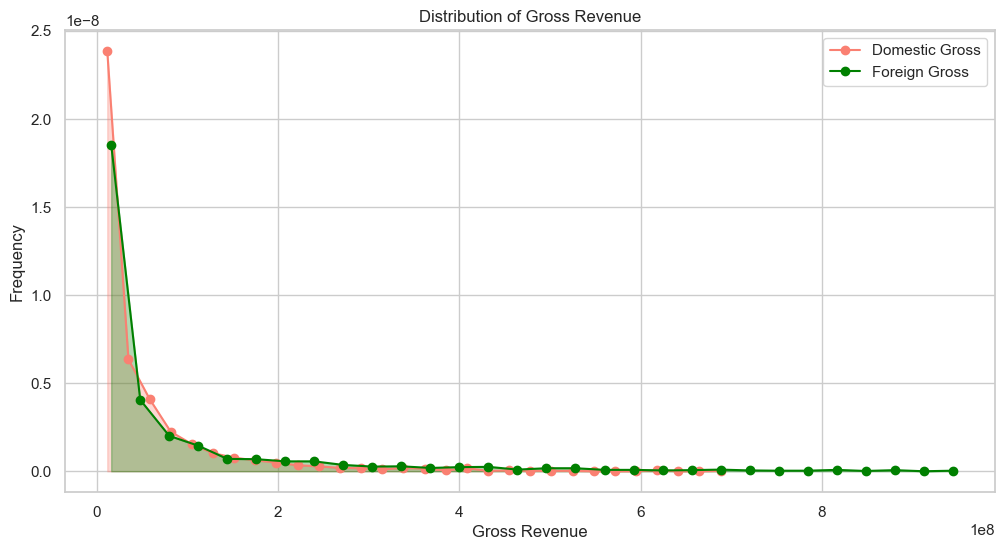

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style of the visualizations
sns.set(style='whitegrid')

# Prepare data for domestic gross
domestic_gross = movie_gross['domestic_gross'].dropna()
domestic_hist_values, domestic_bin_edges = np.histogram(domestic_gross, bins=30, density=True)
domestic_bin_centers = (domestic_bin_edges[:-1] + domestic_bin_edges[1:]) / 2

# Prepare data for foreign gross
foreign_gross = movie_gross['foreign_gross'].dropna()
foreign_hist_values, foreign_bin_edges = np.histogram(foreign_gross, bins=30, density=True)
foreign_bin_centers = (foreign_bin_edges[:-1] + foreign_bin_edges[1:]) / 2

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(domestic_bin_centers, domestic_hist_values, marker='o', linestyle='-', color='salmon', label='Domestic Gross')
plt.fill_between(domestic_bin_centers, domestic_hist_values, alpha=0.3, color='salmon')

plt.plot(foreign_bin_centers, foreign_hist_values, marker='o', linestyle='-', color='green', label='Foreign Gross')
plt.fill_between(foreign_bin_centers, foreign_hist_values, alpha=0.3, color='green')

plt.title('Distribution of Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


in our graph below Peaks in the lines indicate where the revenue values are most concentrated.
the domestic_gross line is higher at lower values and the foreign_gross line peaks at higher value,which truly indicates that  domestic movies might have more lower-grossing films compared to foreign films.


finally lets look at top studios by number of movies

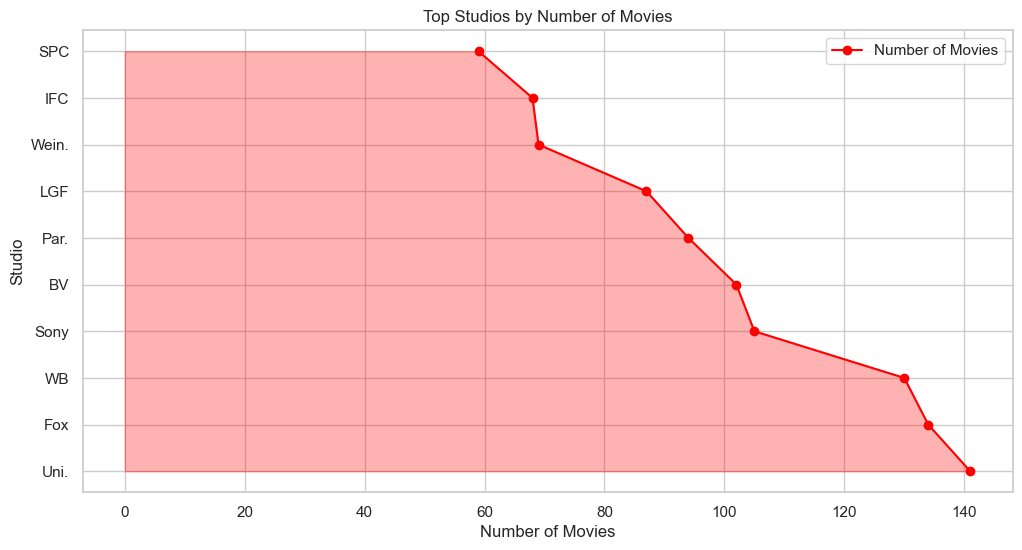

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualizations
sns.set(style='whitegrid')

# Calculate the number of movies per studio
studio_counts = movie_gross['studio'].value_counts().head(10)

# Prepare the data for plotting
studios = studio_counts.index
num_movies = studio_counts.values

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(num_movies, studios, marker='o', linestyle='-', color='red', label='Number of Movies')
plt.fill_betweenx(studios, 0, num_movies, alpha=0.3, color='red')

# Add titles and labels
plt.title('Top Studios by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Studio')
plt.grid(True)
plt.legend()
plt.show()


in our graph here , the SPC studio is the one with the highest number of movies 
for the studios that is sony and WB ,. there is  a significant difference in the number of movies produced.